# Car Data Analysis

## Data import

In [59]:
import requests
import pandas

In [79]:
# define the endpoint
brand = "fiat"
brand_upper = brand.upper()

color = "rood"
color_upper = color.upper()

endpoint = f"https://opendata.rdw.nl/resource/m9d7-ebf2.json?merk={brand_upper}&eerste_kleur={color_upper}"
endpoint

'https://opendata.rdw.nl/resource/m9d7-ebf2.json?merk=FIAT&eerste_kleur=ROOD'

In [80]:
# send the request
response = requests.get(endpoint)

In [81]:
# check the status code
response.status_code

200

In [82]:
# get the data from the response
data = response.json()

In [83]:
# convert the list with dictionaries to a DataFrame
df = pandas.DataFrame(data)

In [84]:
# show the first values of a DataFrame
df.head()

,kenteken,voertuigsoort,merk,handelsbenaming,datum_tenaamstelling,inrichting,eerste_kleur,tweede_kleur,aantal_cilinders,massa_ledig_voertuig,...,uitvoering,aantal_rolstoelplaatsen,vervaldatum_apk_dt,zuinigheidsclassificatie,type,maximum_ondersteunende_snelheid,catalogusprijs,type_gasinstallatie,registratie_datum_goedkeuring_afschrijvingsmoment_bpm,registratie_datum_goedkeuring_afschrijvingsmoment_bpm_dt
0,0005RZ,Personenauto,FIAT,DINO COUPE 2400,20130429,Niet geregistreerd,ROOD,Niet geregistreerd,6,1377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0022HZ,Personenauto,FIAT,124 SPORT CABRIOLET,19761029,Niet geregistreerd,ROOD,Niet geregistreerd,4,910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0054NG,Personenauto,FIAT,SPORT 850 CABRIOLET,20021206,Niet geregistreerd,ROOD,Niet geregistreerd,4,725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0085DJ,Personenauto,FIAT,NUOVA 500,20150320,Niet geregistreerd,ROOD,Niet geregistreerd,2,511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0094RT,Personenauto,FIAT,850 E SPECIAL,20161001,Niet geregistreerd,ROOD,Niet geregistreerd,4,692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

### Selection of columns

Columns:
* merk
* handelsbenaming
* catalogusprijs
* datum_tenaamstelling
* voertuig_soort
* aantal_cilinders

In [93]:
# specify a list of columns
columns_list = ['merk', 'handelsbenaming', 'catalogusprijs', 
                'datum_tenaamstelling', 'voertuigsoort', 'aantal_cilinders']

In [114]:
# use the list to get the columns from the DataFrame
df_filtered = df[columns_list]

In [115]:
# show the data frame
df_filtered['catalogusprijs'].value_counts()

catalogusprijs
20695    11
10145     8
11215     8
9720      7
13239     6
         ..
9570      1
16422     1
16695     1
16258     1
13325     1
Name: count, Length: 310, dtype: int64

In [116]:
df_filtered

,merk,handelsbenaming,catalogusprijs,datum_tenaamstelling,voertuigsoort,aantal_cilinders
0,FIAT,DINO COUPE 2400,NaN,20130429,Personenauto,6
1,FIAT,124 SPORT CABRIOLET,NaN,19761029,Personenauto,4
2,FIAT,SPORT 850 CABRIOLET,NaN,20021206,Personenauto,4
3,FIAT,NUOVA 500,NaN,20150320,Personenauto,2
4,FIAT,850 E SPECIAL,NaN,20161001,Personenauto,4
...,...,...,...,...,...,...
995,FIAT,FIAT PANDA,NaN,20200717,Personenauto,4
996,FIAT,FIAT 500,NaN,20230306,Personenauto,4
997,FIAT,NUOVA 500,NaN,20210928,Personenauto,2
998,FIAT,600L,NaN,20230907,Personenauto,4


In [117]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   merk                  1000 non-null   object
 1   handelsbenaming       1000 non-null   object
 2   catalogusprijs        428 non-null    object
 3   datum_tenaamstelling  962 non-null    object
 4   voertuigsoort         1000 non-null   object
 5   aantal_cilinders      1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


### Convert data types

In [118]:
# convert the catalogusprijs
df_filtered['catalogusprijs'] = df_filtered['catalogusprijs'].astype(float)

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_75117/3662220194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['catalogusprijs'] = df_filtered['catalogusprijs'].astype(float)


In [119]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   merk                  1000 non-null   object 
 1   handelsbenaming       1000 non-null   object 
 2   catalogusprijs        428 non-null    float64
 3   datum_tenaamstelling  962 non-null    object 
 4   voertuigsoort         1000 non-null   object 
 5   aantal_cilinders      1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [120]:
df_filtered['catalogusprijs'].min()

7845.0

In [121]:
df_filtered = df_filtered.dropna(subset=['catalogusprijs'])

# or
#df_filtered['aantal_cilinders'].fillna(0)

In [122]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 20 to 994
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   merk                  428 non-null    object 
 1   handelsbenaming       428 non-null    object 
 2   catalogusprijs        428 non-null    float64
 3   datum_tenaamstelling  414 non-null    object 
 4   voertuigsoort         428 non-null    object 
 5   aantal_cilinders      428 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.4+ KB


In [123]:
df_filtered

,merk,handelsbenaming,catalogusprijs,datum_tenaamstelling,voertuigsoort,aantal_cilinders
20,FIAT,FIAT PANDA,10137.0,20161119,Personenauto,4
21,FIAT,FIAT 500,15804.0,20180518,Personenauto,4
22,FIAT,FIAT 500,15837.0,20221201,Personenauto,4
23,FIAT,FIAT PUNTO,14998.0,20230630,Personenauto,4
24,FIAT,FIAT 500,16268.0,20220924,Personenauto,4
...,...,...,...,...,...,...
978,FIAT,FIAT PUNTO,15339.0,20120928,Personenauto,2
983,FIAT,PANDA,12439.0,20160315,Personenauto,2
984,FIAT,PANDA,12950.0,20210528,Personenauto,2
988,FIAT,PANDA,13325.0,20220826,Personenauto,2


In [124]:
# int
df_filtered['aantal_cilinders'] = df_filtered['aantal_cilinders'].astype(int)


/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_75117/3274051065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['aantal_cilinders'] = df_filtered['aantal_cilinders'].astype(int)


In [125]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 20 to 994
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   merk                  428 non-null    object 
 1   handelsbenaming       428 non-null    object 
 2   catalogusprijs        428 non-null    float64
 3   datum_tenaamstelling  414 non-null    object 
 4   voertuigsoort         428 non-null    object 
 5   aantal_cilinders      428 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 23.4+ KB


In [127]:
df_filtered['aantal_cilinders'].head()

20    4
21    4
22    4
23    4
24    4
Name: aantal_cilinders, dtype: int64

In [128]:
df_filtered['datum_tenaamstelling'].head()

20    20161119
21    20180518
22    20221201
23    20230630
24    20220924
Name: datum_tenaamstelling, dtype: object

In [129]:
# convert the date data type
df_filtered['datum_tenaamstelling'] = pandas.to_datetime(df_filtered['datum_tenaamstelling'], format="%Y%m%d")

/var/folders/ds/njs8n39s3nq3v_q1_vxpq1zc0000gn/T/ipykernel_75117/1494564696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datum_tenaamstelling'] = pandas.to_datetime(df_filtered['datum_tenaamstelling'], format="%Y%m%d")


In [130]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 20 to 994
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   merk                  428 non-null    object        
 1   handelsbenaming       428 non-null    object        
 2   catalogusprijs        428 non-null    float64       
 3   datum_tenaamstelling  414 non-null    datetime64[ns]
 4   voertuigsoort         428 non-null    object        
 5   aantal_cilinders      428 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 23.4+ KB


In [137]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 20 to 994
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   merk                  428 non-null    object        
 1   handelsbenaming       428 non-null    object        
 2   catalogusprijs        428 non-null    float64       
 3   datum_tenaamstelling  414 non-null    datetime64[ns]
 4   voertuigsoort         428 non-null    object        
 5   aantal_cilinders      428 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 39.6+ KB


In [143]:
df_filtered['datum_tenaamstelling'].dt.month_name()

20      November
21           May
22      December
23          June
24     September
         ...    
978    September
983        March
984          May
988       August
994        March
Name: datum_tenaamstelling, Length: 428, dtype: object

In [145]:
df_filtered['catalogusprijs'].describe()

count      428.000000
mean     14053.530374
std       4504.673275
min       7845.000000
25%      10145.000000
50%      13284.500000
75%      16533.250000
max      52967.000000
Name: catalogusprijs, dtype: float64

In [146]:
df_filtered.query("catalogusprijs > 10000")

,merk,handelsbenaming,catalogusprijs,datum_tenaamstelling,voertuigsoort,aantal_cilinders
20,FIAT,FIAT PANDA,10137.0,2016-11-19,Personenauto,4
21,FIAT,FIAT 500,15804.0,2018-05-18,Personenauto,4
22,FIAT,FIAT 500,15837.0,2022-12-01,Personenauto,4
23,FIAT,FIAT PUNTO,14998.0,2023-06-30,Personenauto,4
24,FIAT,FIAT 500,16268.0,2022-09-24,Personenauto,4
...,...,...,...,...,...,...
978,FIAT,FIAT PUNTO,15339.0,2012-09-28,Personenauto,2
983,FIAT,PANDA,12439.0,2016-03-15,Personenauto,2
984,FIAT,PANDA,12950.0,2021-05-28,Personenauto,2
988,FIAT,PANDA,13325.0,2022-08-26,Personenauto,2


In [150]:
# grouping and aggregating
df_filtered.groupby('handelsbenaming').agg({'catalogusprijs': 'mean', 
                                            'aantal_cilinders': 'max'})

,catalogusprijs,aantal_cilinders
handelsbenaming,,
500 ABARTH,26155.000000,4
500 L,23670.000000,2
FIAT 500,16954.208955,4
FIAT BRAVO,23870.111111,4
FIAT DOBLO,21028.250000,4
FIAT DUCATO,52967.000000,4
FIAT PANDA,9620.143939,4
FIAT PUNTO,16068.958333,4
FIAT SEDICI,19998.000000,4


In [154]:
name = "Arie"

# method-chaining
name = (name
        .upper()
        .replace("E", "U")
)
name


'ARIU'

In [155]:
lordify = lambda x: f"Lord. {x}"

In [157]:
lordify("James")

'Lord. James'

In [227]:
# change the plot backend
#pandas.options.plotting.backend = 'plotly'
pandas.options.plotting.backend = 'matplotlib'

In [230]:
# all operations in one data pipe
df_filtered_grouped = (
    df[columns_list] # filter the columns
    .dropna(subset=['catalogusprijs', 'datum_tenaamstelling']) # drop values with NaN's for catalogusprijs
    .assign(
        handelsbenaming = lambda x: x['handelsbenaming'].str.replace("FIAT", "").str.strip(),
        catalogusprijs = lambda x: x['catalogusprijs'].astype(float), # convert
        aantal_cilinders = lambda x: x['aantal_cilinders'].astype(int), # convert
        datum_tenaamstelling = lambda x: pandas.to_datetime(x['datum_tenaamstelling'], format="%Y%m%d")
    )
    .query("catalogusprijs > 10000 & aantal_cilinders >=4") # filter for price and cilinders
    .rename(columns={'handelsbenaming': 'model',
                     'catalogusprijs': 'prijs',
                     'datum_tenaamstelling': 'datum'}) # rename the columns
    .groupby('model')
    .agg({
        'prijs': 'mean',
        'datum': 'min',
        'aantal_cilinders': 'max'
    })
    .assign(
        prijs = lambda x: x['prijs'].round(2)
    )
    .sort_values(by='prijs', ascending=False)
    .reset_index()
)

In [233]:
df_filtered_grouped

,model,prijs,datum,aantal_cilinders
0,DUCATO,52967.00,2018-04-10,4
1,PUNTO ABARTH,24518.00,2023-07-30,4
2,BRAVO,23534.86,2019-02-26,4
3,QUBO,21600.00,2010-05-18,4
4,DOBLO,21028.25,2010-01-21,4
5,SEDICI,19998.00,2010-06-14,4
6,FIORINO QUBO,18142.00,2010-12-09,4
7,500,16520.31,2009-03-31,4
8,PUNTO,15869.53,2011-03-05,4
9,PANDA,10413.06,2010-07-06,4


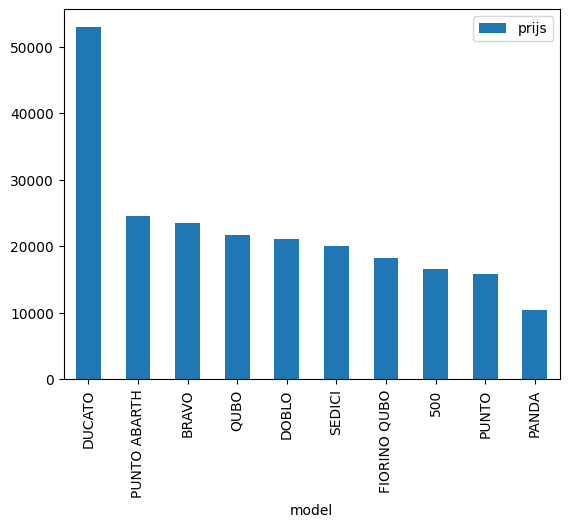

In [235]:
cars_plot = (
    df_filtered_grouped
    .plot
    .bar(x="model", y="prijs")
)

## Export the DataFrame

In [236]:
df_filtered_grouped.to_csv(f"export/{brand}.csv", index=False, sep=";")

In [194]:
df_filtered_grouped['model']

0     FIAT DUCATO
1    PUNTO ABARTH
2      FIAT BRAVO
3            QUBO
4      FIAT DOBLO
5     FIAT SEDICI
6    FIORINO QUBO
7        FIAT 500
8      FIAT PUNTO
9      FIAT PANDA
Name: model, dtype: object

In [169]:
df_filtered_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 20 to 976
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   merk                  189 non-null    object        
 1   handelsbenaming       189 non-null    object        
 2   catalogusprijs        189 non-null    float64       
 3   datum_tenaamstelling  179 non-null    datetime64[ns]
 4   voertuigsoort         189 non-null    object        
 5   aantal_cilinders      189 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 10.3+ KB
